In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
temperature = ctrl.Antecedent(np.arange(10, 31, 1), 'temperature')
preference = ctrl.Antecedent(np.arange(0, 11, 1), 'preference')
heater_power = ctrl.Consequent(np.arange(0, 101, 1), 'heater_power')


In [ ]:
temperature['cold'] = fuzz.trimf(temperature.universe, [10, 10, 18])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [16, 21, 26])
temperature['hot'] = fuzz.trimf(temperature.universe, [24, 30, 30])


In [ ]:
preference['low'] = fuzz.trimf(preference.universe, [0, 0, 4])
preference['medium'] = fuzz.trimf(preference.universe, [3, 5, 7])
preference['high'] = fuzz.trimf(preference.universe, [6, 10, 10])


In [ ]:
heater_power['low'] = fuzz.trimf(heater_power.universe, [0, 0, 40])
heater_power['medium'] = fuzz.trimf(heater_power.universe, [30, 50, 70])
heater_power['high'] = fuzz.trimf(heater_power.universe, [60, 100, 100])


In [ ]:
rule1 = ctrl.Rule(temperature['cold'] & preference['high'], heater_power['high'])
rule2 = ctrl.Rule(temperature['cold'] & preference['medium'], heater_power['medium'])
rule3 = ctrl.Rule(temperature['cold'] & preference['low'], heater_power['low'])
rule4 = ctrl.Rule(temperature['comfortable'], heater_power['low'])
rule5 = ctrl.Rule(temperature['hot'], heater_power['low'])

In [ ]:
heater_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
heater = ctrl.ControlSystemSimulation(heater_ctrl)


Heater Power Output: 82.38


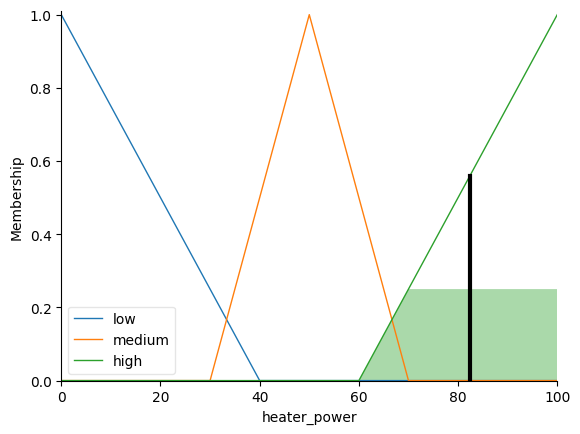

In [ ]:
heater.input['temperature'] = 16
heater.input['preference'] = 8
heater.compute()

print(f"Heater Power Output: {heater.output['heater_power']:.2f}")
heater_power.view(sim=heater)

In [ ]:
!pip install pyswarm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, dual_annealing
from pyswarm import pso
import warnings
warnings.filterwarnings('ignore')

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=4c15bb6ba9a366803521e49a53564d7557e13616f5a70eee108c2ef544772a9d
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
def sphere(x):
    return sum(xi**2 for xi in x)


def rosenbrock(x):
    return sum(100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x)-1))


def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

In [ ]:

def run_optimizer(func, bounds, optimizer_name, dim, runs=15):
    bests = []
    for _ in range(runs):
        if optimizer_name == 'GA':
            result = differential_evolution(func, bounds)
        elif optimizer_name == 'SA':
            result = dual_annealing(func, bounds)
        elif optimizer_name == 'PSO':
            lb = [b[0] for b in bounds]
            ub = [b[1] for b in bounds]
            xopt, fopt = pso(func, lb, ub, swarmsize=30, maxiter=100, debug=False)
            result = type('Result', (object,), {'fun': fopt})
        bests.append(result.fun)

    best = np.min(bests)
    worst = np.max(bests)
    mean = np.mean(bests)
    std = np.std(bests)

    return {
        'mean': mean,
        'std': std,
        'best': best,
        'worst': worst
    }


In [ ]:
functions = {
    'Sphere': sphere,
    'Rosenbrock': rosenbrock,
    'Rastrigin': rastrigin
}

optimizers = ['GA', 'SA', 'PSO']
dimensions = [2, 10]


results = {}

for dim in dimensions:
    print(f"\n--- Dimension: {dim} ---")
    bounds = [(-5, 5)] * dim

    for fname, f in functions.items():
        print(f"\nFunction: {fname}")
        results[f"{fname}_{dim}"] = {}

        for opt in optimizers:
            stats = run_optimizer(f, bounds, opt, dim)
            results[f"{fname}_{dim}"][opt] = stats
            print(f"{opt} -> Mean: {stats['mean']:.4f}, Std: {stats['std']:.4f}, "
                  f"Best: {stats['best']:.4f}, Worst: {stats['worst']:.4f}")



--- Dimension: 2 ---

Function: Sphere
GA -> Mean: 0.0000, Std: 0.0000, Best: 0.0000, Worst: 0.0000
SA -> Mean: 0.0000, Std: 0.0000, Best: 0.0000, Worst: 0.0000
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change 

In [ ]:

results_dict = {
    'GA': [0.01, 0.0, 0.02, ..., 0.00],  # 15 values
    'SA': [0.00, 0.00, ..., 0.00],
    'PSO': [0.5, 1.2, ..., 0.3]
}


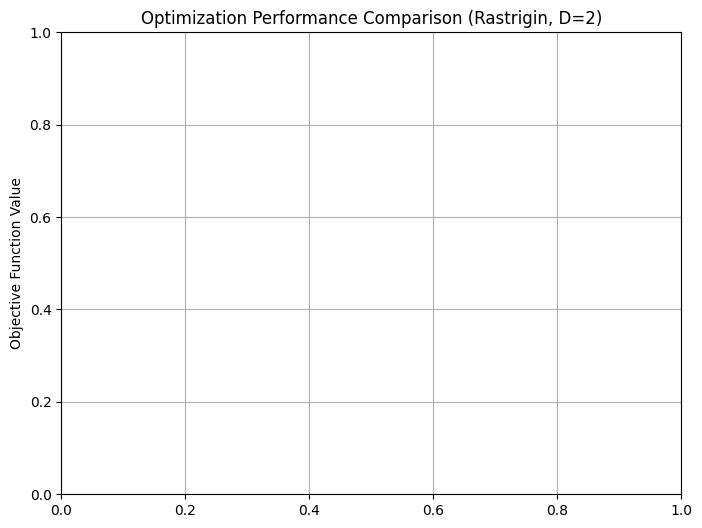

In [ ]:
import seaborn as sns
import pandas as pd


df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in results_dict.items()]))

plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Optimization Performance Comparison (Rastrigin, D=2)")
plt.ylabel("Objective Function Value")
plt.grid(True)
plt.show()


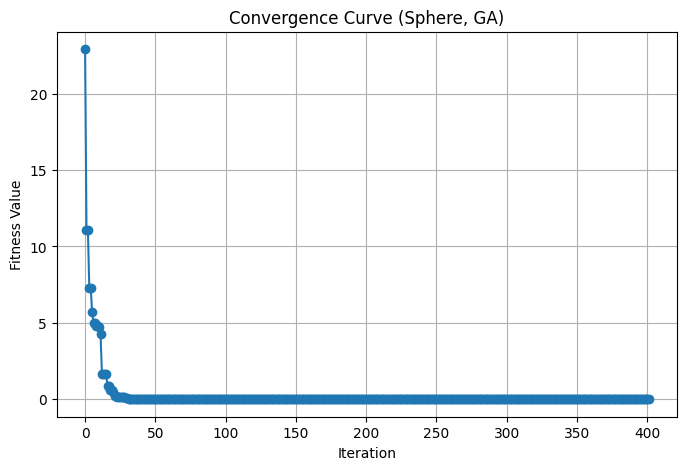

In [ ]:
from scipy.optimize import differential_evolution

fitness_history = []

def track_convergence(xk, convergence):

    fitness = sphere(xk)
    fitness_history.append(fitness)

bounds = [(-5, 5)] * 10  # D=10
_ = differential_evolution(sphere, bounds, callback=track_convergence)


plt.figure(figsize=(8, 5))
plt.plot(fitness_history, marker='o')
plt.title("Convergence Curve (Sphere, GA)")
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.grid(True)
plt.show()


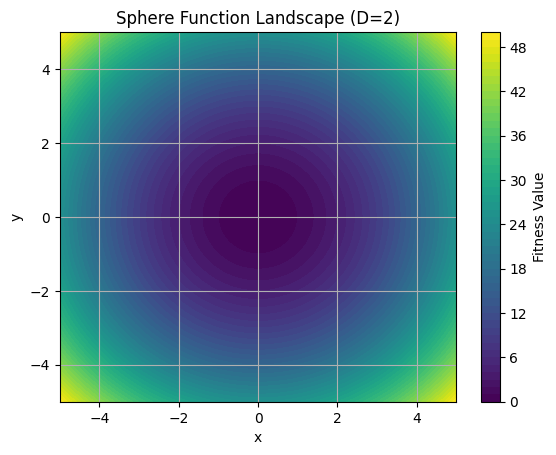

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.title("Sphere Function Landscape (D=2)")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Fitness Value")
plt.grid(True)
plt.show()


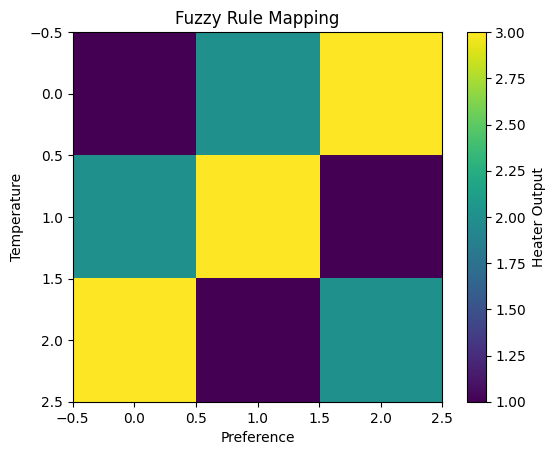

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


rules = np.array([
    [1, 2, 3],
    [2, 3, 1],
    [3, 1, 2]
])
plt.imshow(rules, cmap='viridis')
plt.title("Fuzzy Rule Mapping")
plt.xlabel("Preference")
plt.ylabel("Temperature")
plt.colorbar(label="Heater Output")
plt.show()
